# Sheet
Vergelijk de verschillen in de NBS per issue en per waarde van p

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

pd.set_option('display.max_rows', 750)
pd.set_option('display.max_columns', 500)

In [2]:
conn = sqlite3.connect('/home/jelmert/Documents/decide-kopenhagen-no-ties.db')

In [3]:
df = pd.read_sql("""
SELECT
        a.name AS actor,
        i.name as issue,
        AVG(ai.position) as postion,        
        i2.pointer                                AS iteration,
        m.p,
        m.id  
      FROM actorissue ai
        LEFT JOIN issue i ON ai.issue_id = i.id
        LEFT JOIN actor a ON ai.actor_id = a.id
        LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
        LEFT JOIN repetition r ON i2.repetition_id = r.id
        LEFT JOIN modelrun m ON r.model_run_id = m.id
        LEFT JOIN dataset d ON a.data_set_id = d.id
      WHERE  ai.type_int = 0 AND d.id = ?
     GROUP BY m.id, i2.pointer, a.id, i.id;
""", 
                 conn, 
                 params=(1,),
                 index_col=['actor', 'issue','p'],                  
                 columns=['postion']
                )

table = pd.pivot_table(df, index=['actor', 'issue','iteration'], columns=['p'],values=['postion'])


# Posities 
Verloop van de positie over de verschillende onderhandelingsrondes van de actor per issue 

In [5]:
table

postion                          \
p                                             0.00        0.05        0.15   
actor            issue       iteration                                       
Australia        Commitments 0           16.666667   16.666667   16.666667   
                             1           11.000000   11.000000   11.000000   
                             2            7.260000    7.260000    7.260000   
                             3            4.791600    4.791600    4.791600   
                             4            3.162456    3.162456    3.162456   
                             5            2.087221    2.087221    2.087221   
                             6            1.377566    1.377566    1.377566   
                             7            0.909193    0.909193    0.909193   
                             8            0.600068    0.600068    0.600068   
                             9            0.396045    0.396045    0.396045   
                 Control     0           46.153846   46.153846   46.153846   
                             1           46.153846   46.153846   46.153846   
                             2           46.153846   46.153846   46.153846   
                             3           46.153846   46.153846   46.153846   
                             4           52.629813   52.610800   52.262011   
                             5           52.629813   52.610800   52.531858   
                             6           52.629813   52.610800   52.531858   
                             7           52.629813   52.610800   52.531858   
                             8           52.629813   52.610800   52.531858   
                             9           61.407757   61.361451   60.855300   
                 DevlopC2020 0           66.666667   66.666667   66.666667   
                             1           46.666667   46.666667   46.666667   
                             2           33.911359   33.915071   34.646436   
                             3           53.737951   53.740550   53.208523   
                             4           41.987911   41.994011   42.581987   
                             5           59.391538   59.395284   58.822406   
                             6           48.230375   48.238493   48.704952   
                             7           63.539514   63.400254   60.631478   
                             8           52.514697   52.656374   54.113333   
                             9           66.453349   54.029274   55.187062   
                 Domestred   0           60.000000   60.000000   60.000000   
                             1           60.000000   60.000000   59.792000   
                             2           55.974732   55.953322   55.714166   
                             3           55.974732   55.953322   55.714166   
                             4           55.974732   55.953322   55.714166   
                             5           55.974732   55.953322   55.714166   
                             6           55.974732   55.953322   55.714166   
                             7           55.974732   55.950525   55.681503   
                             8           55.974732   55.950525   55.675903   
                             9           55.732276   55.701707   55.435962   
                 Extra       0           25.000000   25.000000   25.000000   
                             1           36.475000   36.477385   36.479530   
                             2           24.073500   24.075074   24.076490   
                             3           15.888510   15.889549   15.890483   
                             4           10.486417   10.487102   10.487719   
                             5            6.921035    6.921488    6.921894   
                             6            4.567883    4.568182    4.568450   
                             7            3.014803    3.015000    3.015177   
                             8            1.989770    1.989900   

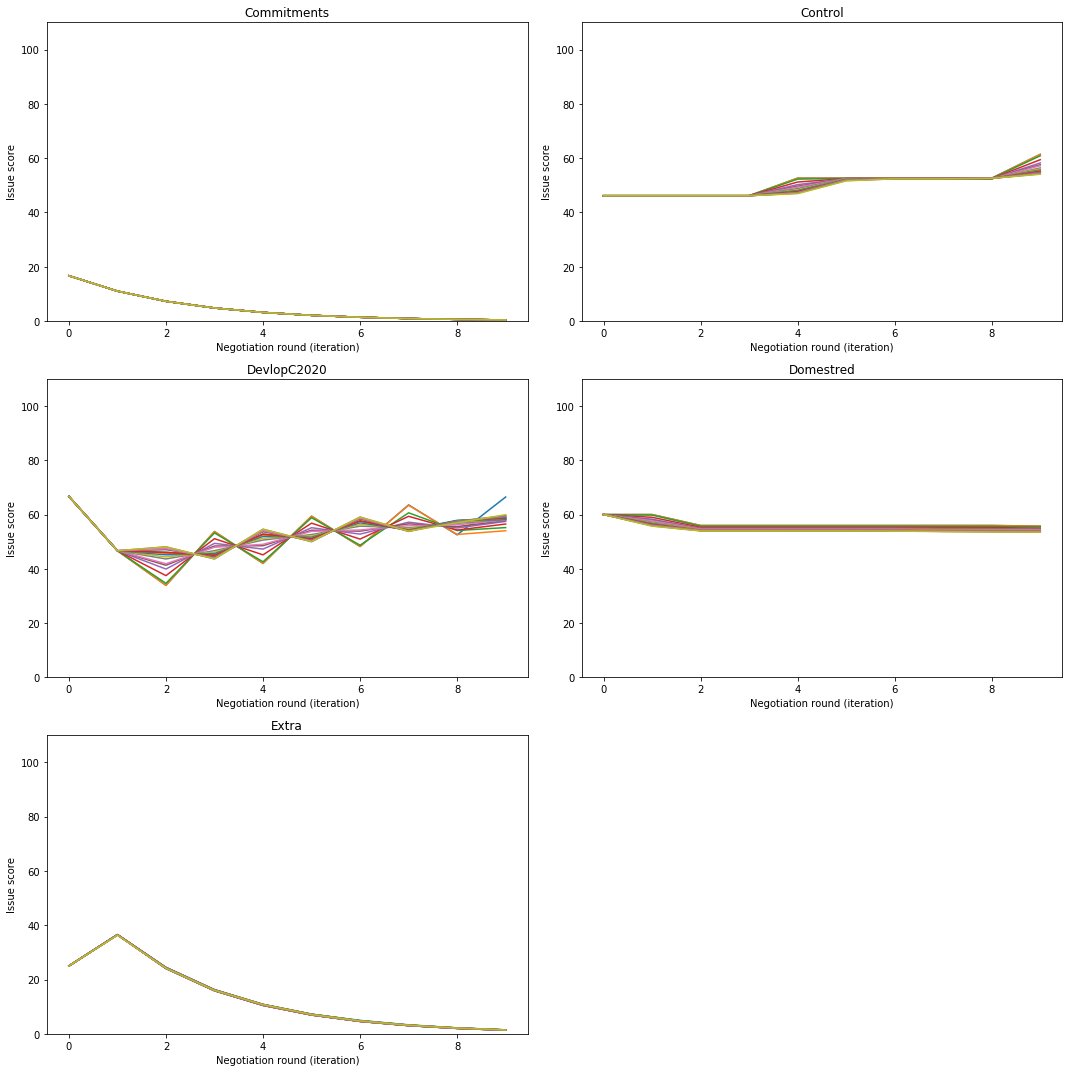

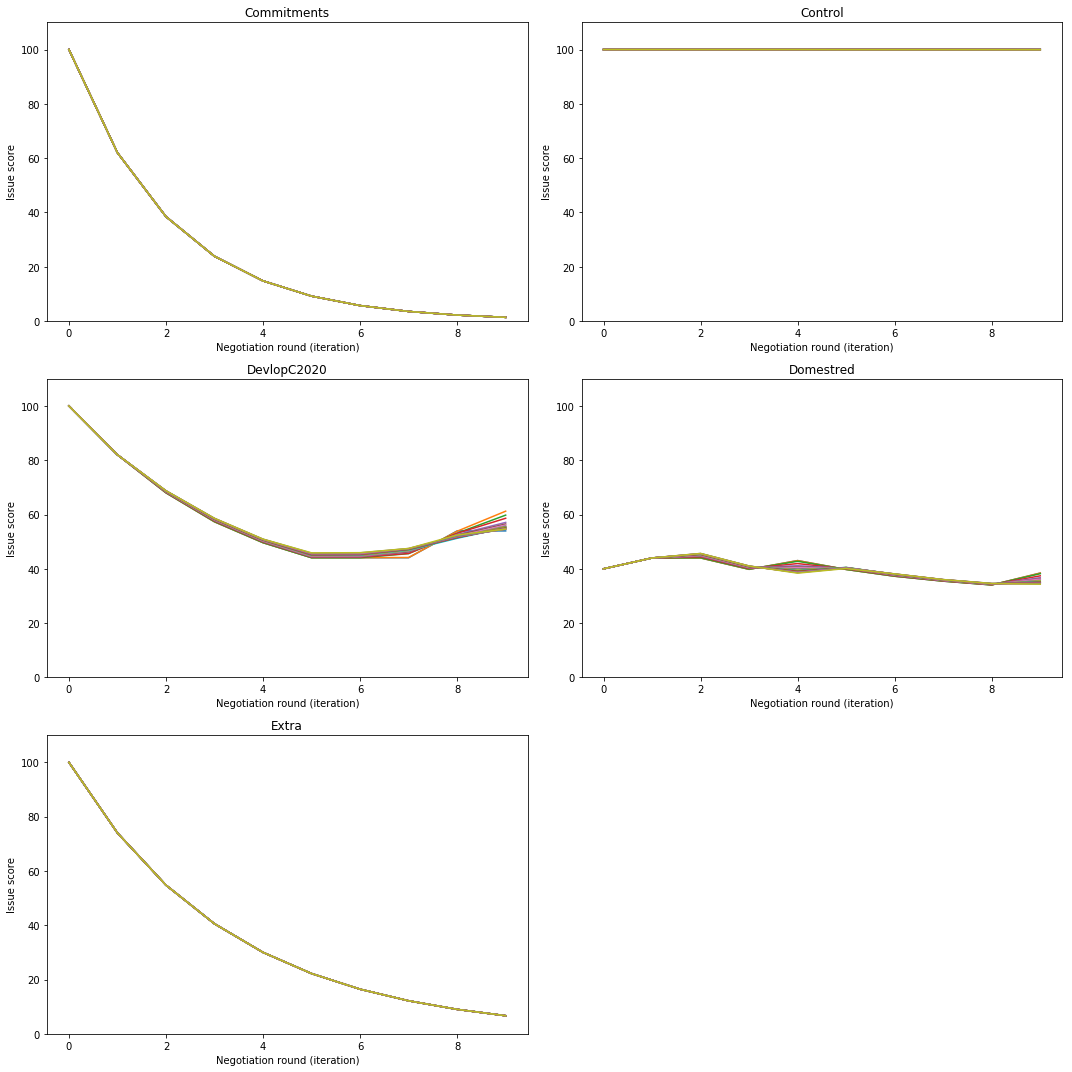

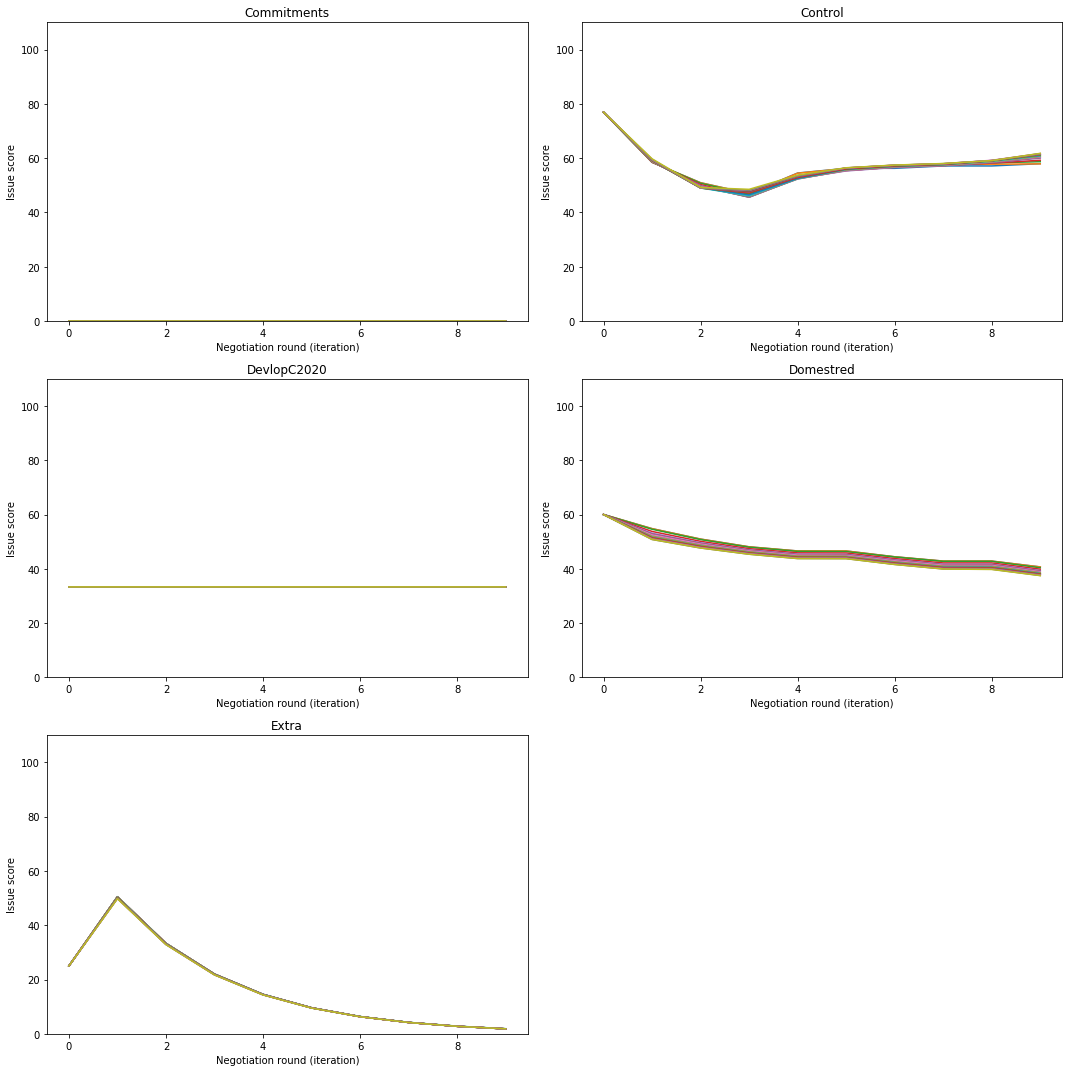

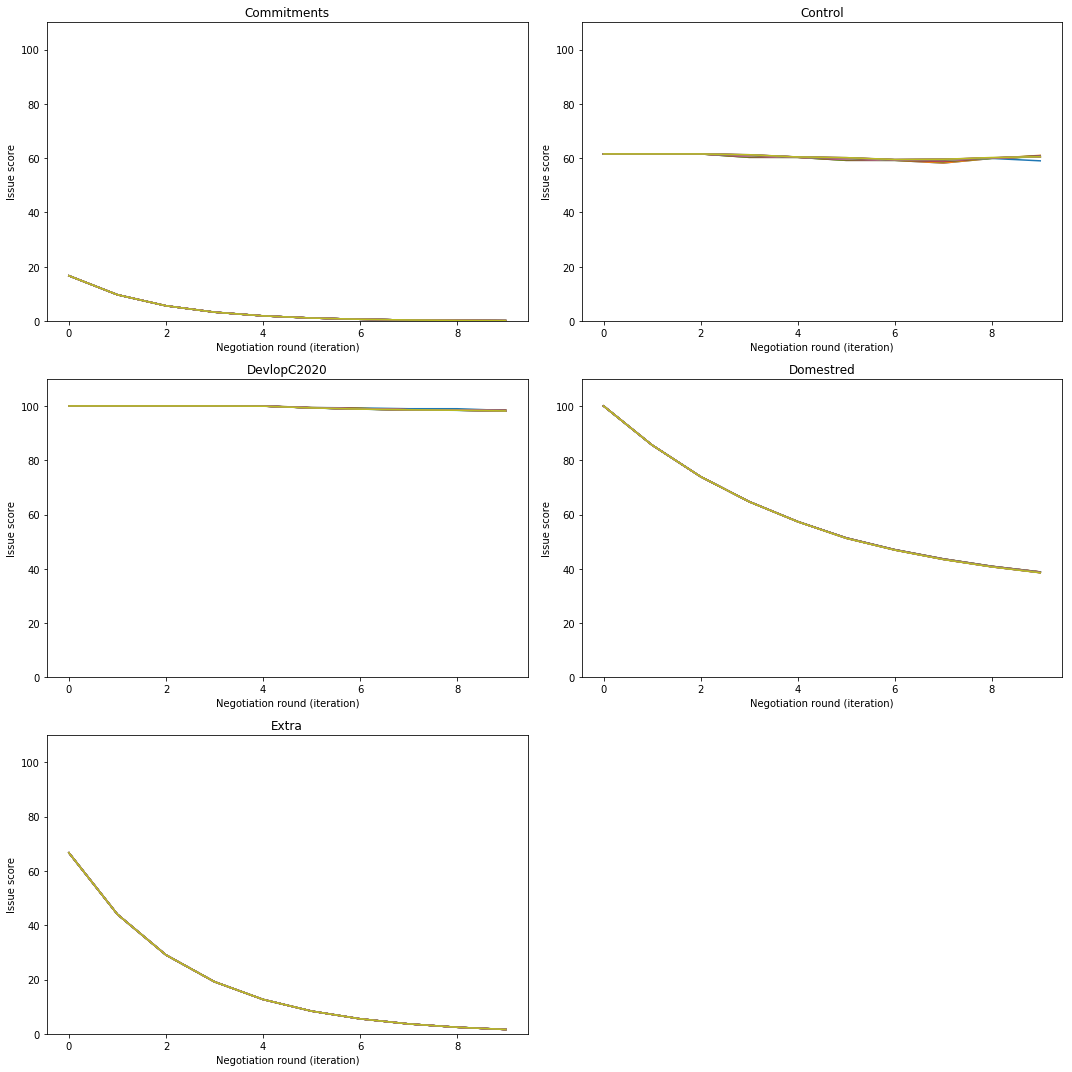

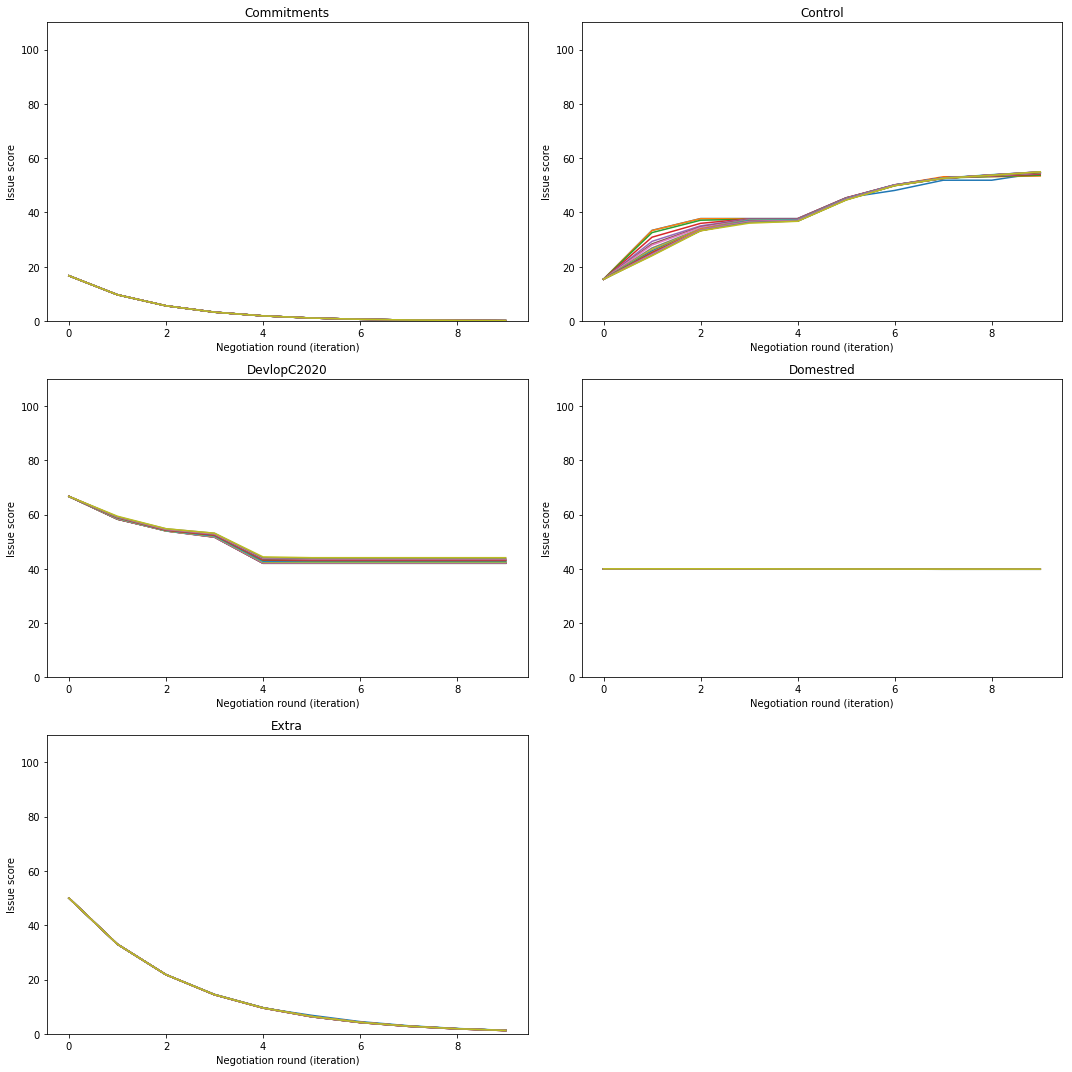

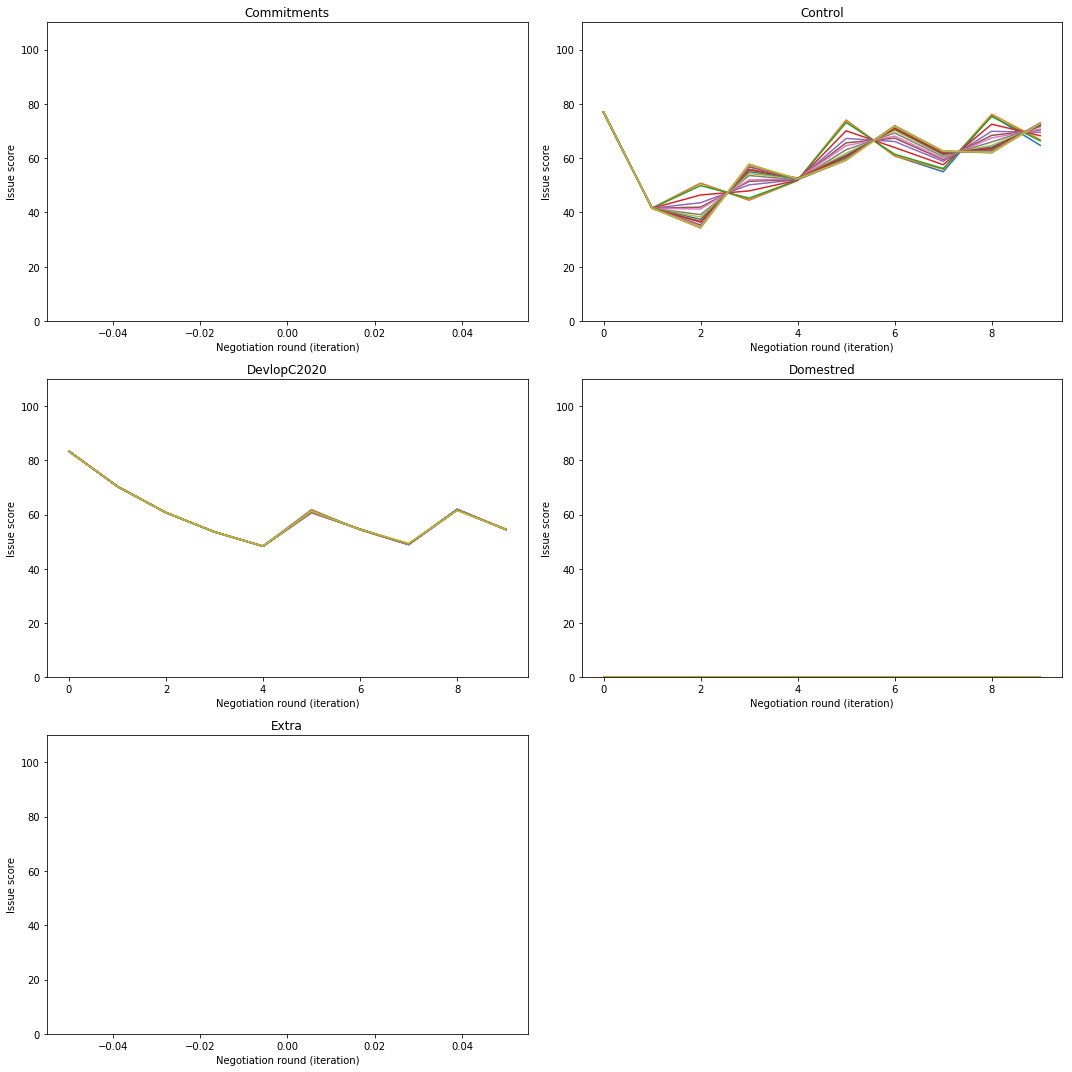

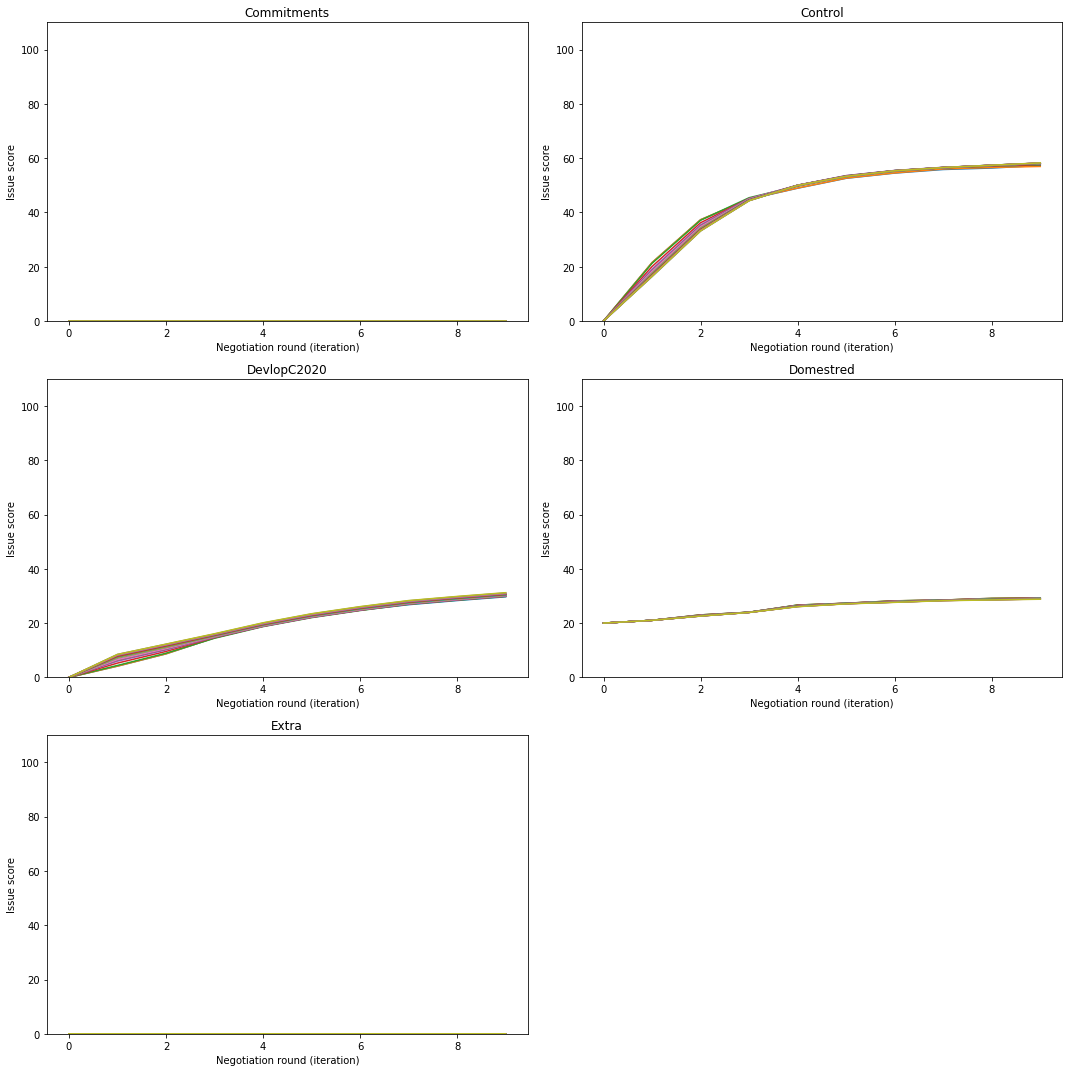

In [24]:
cursor = conn.execute('SELECT `name`, `id`, lower, upper FROM issue ORDER BY `name`')
issues = cursor.fetchall()

cursor = conn.execute('SELECT `name`, `id` FROM actor ORDER BY `name`')
actors = cursor.fetchall()

for actor, actor_id in actors:
    
    fig, axes = plt.subplots(3, 2, figsize=(15,15))  # a figure with a 2x2 grid of Axes    
    i = 0
    fig.delaxes(axes[2,1])
    display(HTML('<hr><h1><center>{}</center></h1>'.format(actor)))
    for issue in issues:
        
        row = int(i / 2)
        col = i % 2
        
        subset = table.query('actor == ["{}"] and issue == ["{}"]'.format(actor, issue[0]))
        subchart = axes[row, col]
        subchart.plot(subset.values)
        subchart.set_ylim(0, 110)        
        subchart.set_title(issue[0])
        subchart.set_ylabel('Issue score')
        subchart.set_xlabel('Negotiation round (iteration)')
        
        i+=1
        
    
    plt.tight_layout()
    plt.show()
    